- Objective: Analyze what factors affect car prices
- Dataset source: [Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download)
- Tools used: Python, Pandas, Seaborn, Matplotlib


In [71]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
print(os.getcwd())

d:\Projects_Tegebly_Sho8l_b3oon_allah\Portfolio\Showcase\Car_Prices\notebooks


In [72]:
df = pd.read_csv('../data/CarPrice_Assignment.csv')
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Database info showed that it contains 26 columns and 250 entries

In [74]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

- Database Contains no null values

In [75]:
df.duplicated().any()

np.False_

- Database Contains no duplicates

In [76]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [77]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [78]:
pd.DataFrame(df.dtypes)

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [79]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- Checking unique values in each column

- Exploring categorical values

#1 fueltype

In [80]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [81]:
df.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

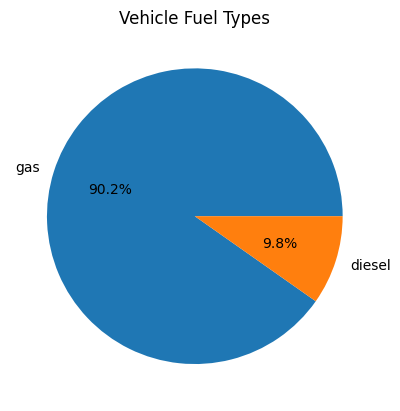

In [82]:
fuel_counts = df['fueltype'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Vehicle Fuel Types')
plt.show()

- Obesrvations:
- Most cars are running gas with 90.2%


#2 fuelsystem

In [83]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [84]:
df.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29578defb10>,
 [Text(0.14288238112612972, 1.0906808081027775, 'mpfi'),
  Text(-0.8041694565737162, -0.7505407951030604, '2bbl'),
  Text(0.5254918056125668, -0.9663634731476788, 'idi'),
  Text(0.9093145394748149, -0.6189887465048985, '1bbl'),
  Text(1.053699086692271, -0.3157819417000822, 'spdi'),
  Text(1.093676896387853, -0.11777455713113001, '4bbl'),
  Text(1.0988377159346445, -0.050553674837083784, 'mfi'),
  Text(1.099870841749064, -0.016856199755753802, 'spfi')],
 [Text(0.07793584425061621, 0.5949168044196967, '45.9%'),
  Text(-0.43863788540384513, -0.4093858882380329, '32.2%'),
  Text(0.286631893970491, -0.527107348989643, '9.8%'),
  Text(0.4959897488044444, -0.33763022536630827, '5.4%'),
  Text(0.5747449563776023, -0.1722446954727721, '4.4%'),
  Text(0.5965510343933742, -0.06424066752607091, '1.5%'),
  Text(0.5993660268734424, -0.027574731729318423, '0.5%'),
  Text(0.5999295500449439, -0.00919429077586571, '0.5%')])

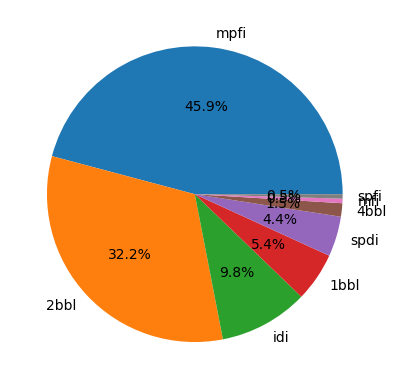

In [85]:
fuel_systemcounts=df.fuelsystem.value_counts()
plt.pie(fuel_systemcounts,labels=fuel_systemcounts.index,autopct='%1.1f%%')

- Pie chart is not very good looking so we use histogram to plot

Text(0.5, 1.0, 'Distribution of Fuel System')

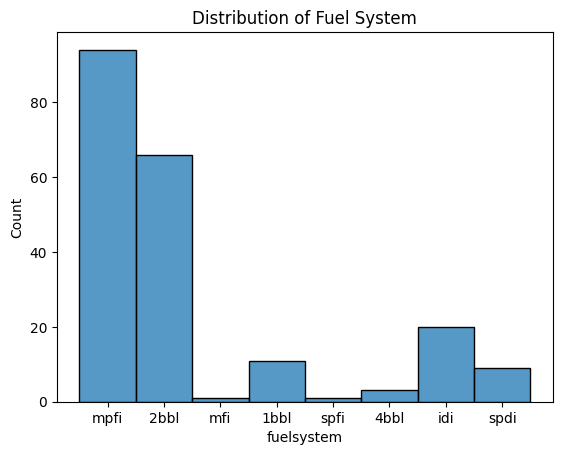

In [86]:
sns.histplot(data=df.fuelsystem)
plt.title('Distribution of Fuel System')


In [87]:
df[df['fuelsystem'] == '4bbl'][['CarName']]


,CarName
55,mazda 626
56,mazda glc
57,mazda rx-7 gs


In [88]:
df[df['fuelsystem'] == 'mfi'][['CarName']]


,CarName
29,dodge coronet custom (sw)


In [89]:
df[df['fuelsystem'] == 'spfi'][['CarName']]


,CarName
46,isuzu D-Max


- Obesrvations:
- The cars with type "4bbl" are mazda
- The car with type "mfi" is dodge
- The car with the type "spfi" is isuzu


#3 aspiration

In [90]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [91]:
aspiration_counts=df['aspiration'].value_counts()
aspiration_counts

aspiration
std      168
turbo     37
Name: count, dtype: int64

Text(0.5, 1.0, 'Aspiration types split')

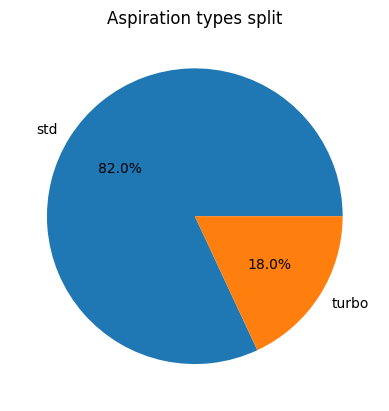

In [92]:
plt.pie(aspiration_counts,labels=aspiration_counts.index,autopct='%1.1f%%')
plt.title('Aspiration types split')

- Cars with std aspiration type dominate the data

In [93]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

#4 doornumber

In [94]:
doornumber_types=df['doornumber'].value_counts()
doornumber_types

doornumber
four    115
two      90
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29578e89f90>,
 [Text(-0.20943024478245773, 1.079879147206001, 'four'),
  Text(0.20942995299360936, -1.0798792037950795, 'two')],
 [Text(-0.11423467897224965, 0.5890249893850914, '56.1%'),
  Text(0.114234519814696, -0.5890250202518614, '43.9%')])

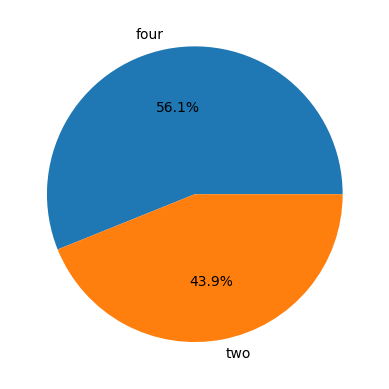

In [95]:
plt.pie(doornumber_types,labels=doornumber_types.index,autopct='%1.1f%%')

#5 carbody

In [96]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [97]:
Carbody_counts=df['carbody'].value_counts()
Carbody_counts

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29578eb1a90>,
 [Text(0.10939150989124569, 1.0945471655272392, 'sedan'),
  Text(-0.7063487626681991, -0.8432505116969121, 'hatchback'),
  Text(0.7566804268683581, -0.7983950974262802, 'wagon'),
  Text(1.0487361636589596, -0.33189224009290746, 'hardtop'),
  Text(1.0953532541075965, -0.10100123125932357, 'convertible')],
 [Text(0.05966809630431582, 0.5970257266512213, '46.8%'),
  Text(-0.38528114327356316, -0.459954824561952, '34.1%'),
  Text(0.41273477829183164, -0.4354882349597892, '12.2%'),
  Text(0.5720379074503416, -0.1810321309597677, '3.9%'),
  Text(0.5974654113314162, -0.055091580686903764, '2.9%')])

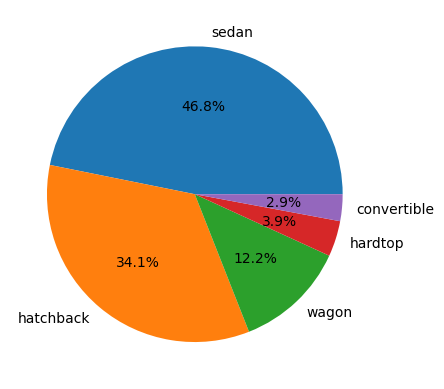

In [98]:
plt.pie(Carbody_counts,labels=Carbody_counts.index,autopct='%1.1f%%')

- Again the pie chart not soo good looking

Text(0.5, 1.0, 'Distribution Car body')

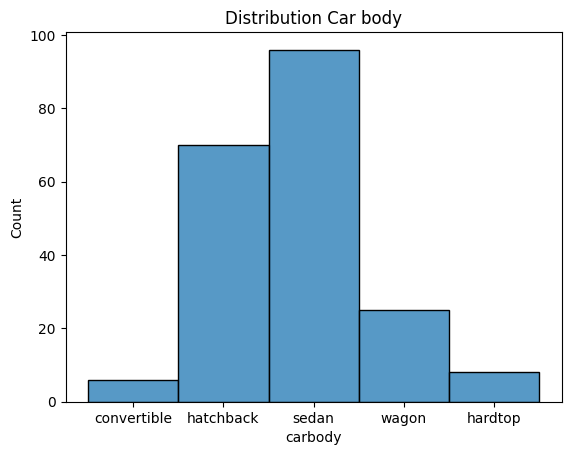

In [99]:
sns.histplot(data=df['carbody'])
plt.title('Distribution Car body')

- Observations
- Most cars are sedan

#6 drivewheel

In [100]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [101]:
drivewheelcounts=df['drivewheel'].value_counts()
drivewheelcounts

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Text(0.5, 1.0, 'Drivewheel Split')

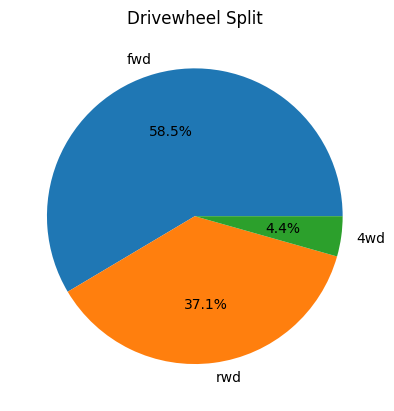

In [102]:
plt.pie(drivewheelcounts,labels=drivewheelcounts.index,autopct='%1.1f%%')
plt.title('Drivewheel Split')

#7 drivewheel

In [103]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [104]:
enginelocationCounts=df['enginelocation'].value_counts()
enginelocationCounts

enginelocation
front    202
rear       3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29578f8a490>,
 [Text(-1.098837699462108, 0.05055403288385589, 'front'),
  Text(1.0988377159346445, -0.050553674837083784, 'rear')],
 [Text(-0.5993660178884226, 0.027574927027557754, '98.5%'),
  Text(0.5993660268734424, -0.027574731729318423, '1.5%')])

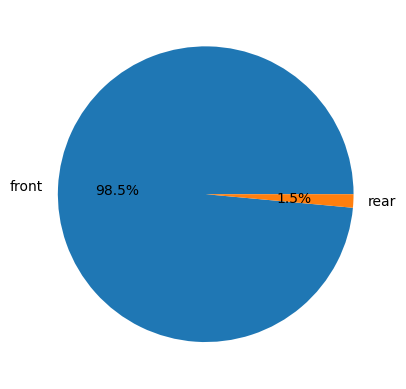

In [105]:
plt.pie(enginelocationCounts,labels=enginelocationCounts.index,autopct='%1.1f%%')

In [106]:
df[df['enginelocation']=='rear']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


- Noted here that all rear mounted engines are porsche

## Categorical Variables Analysis Summary

### 1. Fuel Type Analysis
#### Distribution of Vehicle Fuel Types
- **Key Findings:**
  - Gas-powered vehicles dominate the dataset (90.2%)
  - Diesel vehicles make up the remaining percentage

### 2. Fuel System Analysis
#### Distribution of Fuel Systems
- **Key Findings:**
  - **4bbl System:** Found in Mazda vehicles
  - **MFI System:** Found in Dodge vehicles
  - **SPFI System:** Found in Isuzu vehicles

### 3. Aspiration Analysis
#### Distribution of Aspiration Types
- **Key Findings:**
  - Standard aspiration type dominates the dataset
  - Turbo aspiration represents a smaller portion

### 4. Door Number Analysis
#### Distribution of Door Numbers
- Analysis of two-door vs. four-door vehicles

### 5. Car Body Analysis
#### Distribution of Car Body Types
- Analysis of different car body styles (sedan, hatchback, etc.)

- Numerical Variable Analysis

In [107]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Initial Price destribution analysis

In [108]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

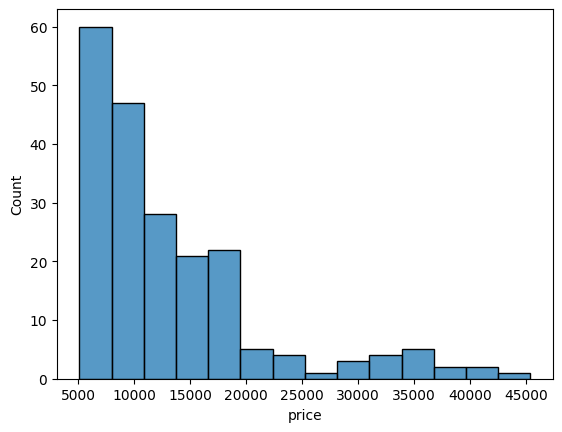

In [109]:
sns.histplot(df['price'])

<Axes: ylabel='price'>

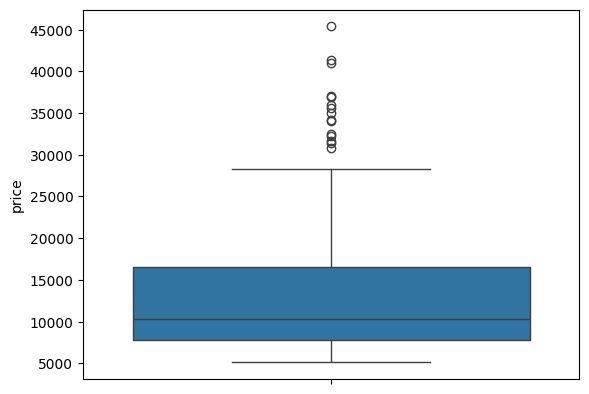

In [110]:
sns.boxplot(df['price'])

- Relation between car body type and price

<Axes: xlabel='carbody', ylabel='price'>

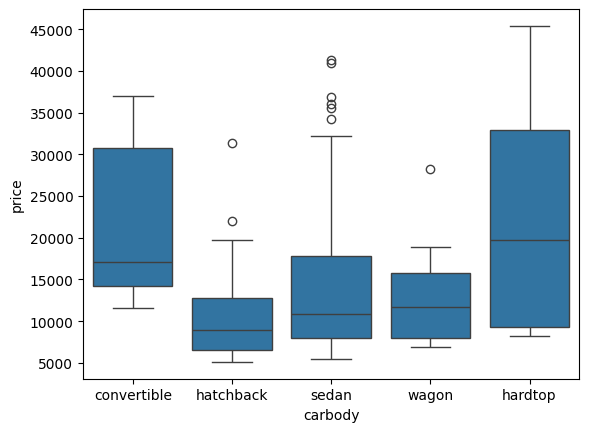

In [111]:
sns.boxplot(df,x=df['carbody'],y=df['price'])

# Price Analysis by Car Body Type

## Key Findings from Box Plot Analysis

### 1. Hardtop Cars
- Highest maximum price value
- Highest median price among all body types
- Indicates premium/luxury positioning in the market
- Suggests consistent high pricing across hardtop models

### 2. Wagon Body Type
- Contains an outlier
- May indicate special or unique wagon models
- Could represent either luxury or economy variants

### 3. Sedan Body Type
- Multiple outliers present
- High price variability
- Suggests diverse market positioning:
  - Luxury sedans
  - Economy sedans
  - Mid-range options

### 4. Hatchback Body Type
- Lowest median price
- Generally more affordable
- Likely positioned as entry-level or economy vehicles
- More consistent pricing distribution

## Implications
- Hardtop models come with premium pricing
- Hatchbacks act as entry-level options
- Sedans show the most price diversity
- Wagon market may have unique positioning


- Closer look at hardtop body type


In [112]:
df[df['carbody'] == 'hardtop']['price'].max()

np.float64(45400.0)

In [113]:
df[df['carbody'] == 'hardtop']['price'].median()

np.float64(19687.5)

In [114]:
df[df['carbody'] == 'hardtop']['price'].min()

np.float64(8249.0)

- Identifying outlier in wagon body type


In [115]:
df[df['carbody']=='wagon']['price'].max()

np.float64(28248.0)

In [116]:
max_price_idx = df[df['carbody'] == 'wagon']['price'].idxmax()
carname = df.loc[max_price_idx,'CarName']
carname

'buick century luxus (sw)'

- Outlier car in wagon is buick century luxus

- Relation between price and engine type


In [117]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

<Axes: xlabel='enginetype', ylabel='price'>

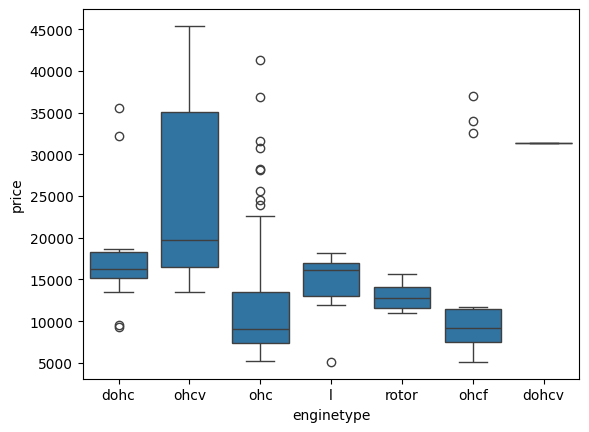

In [118]:
sns.boxplot(df,x=df['enginetype'],y=df['price'])

# Price Analysis by Engine Type

## Key Findings from Box Plot Analysis

### 1. OHC (Overhead Cam) Engine Type
- Lowest median price among all engine types
- Contains several outliers
- High price variability
- Suggests diverse market positioning:
  - Some premium OHC models (upper outliers)
  - Many economy OHC models (lower median)
  - Wide range of applications

### 2. OHV (Overhead Valve) Engine Type
- Highest median price
- Indicates premium positioning in the market
- Suggests OHV engines are associated with higher-end vehicles
- Known for durability and performance characteristics

### 3. L-Type Engine
- Contains an outlier
- May indicate special or unique L-type engine models
- Could represent either luxury or economy variants
- Generally more consistent pricing distribution

### 4. OHCF (Overhead Cam Flat) Engine Type
- One of the lowest price ranges
- Similar to OHC in terms of price positioning
- Limited price variability
- Primarily used in entry-level or economy vehicles

## Implications
- OHV engines come with premium pricing
- OHC engines show the most price diversity indicating that it's used in a wider range of vehicles 
- L-type and OHCF engines have more limited price ranges
- Engine type appears to be a significant factor in vehicle pricing

- Relation between price and engine size

In [119]:
df['enginesize'].nunique()

44

- Since the large number for unique values for engine size we can't use box plot

<Axes: xlabel='enginesize', ylabel='price'>

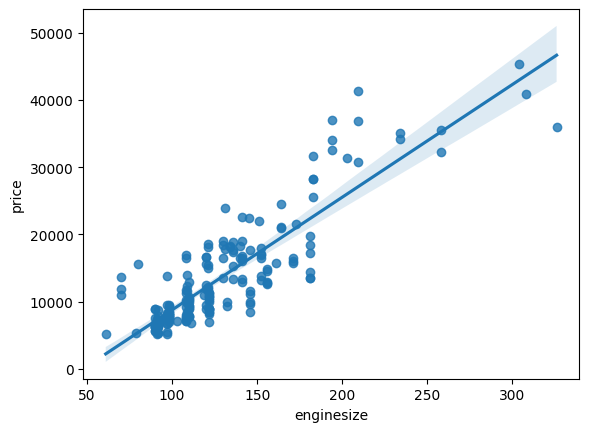

In [120]:
sns.regplot(df,x=df['enginesize'],y=df['price'])

# Price Analysis by Engine Size

## Key Findings from Scatter Plot Analysis

### Relationship between Price and Engine Size
- Positive correlation between engine size and price
- As engine size increases, price generally increases
- However, the relationship is not very strong, as indicated by:
  - Significant scatter around the regression line
  - Considerable variation in prices for similar engine sizes
  - Some outliers deviating from the general trend

### Data Distribution Characteristics
- Wide range of engine sizes in the dataset
- Considerable price variation even for similar engine sizes
- Some vehicles with larger engines have lower prices than expected
- Some vehicles with smaller engines have higher prices than expected

## Implications
- Engine size is one of several factors affecting vehicle price
- The moderate correlation suggests that while engine size matters, other factors (like brand, features, etc.) also significantly influence price
- The scatter in the data indicates that engine size alone is not a reliable predictor of price


- Let's try to explore relation between brand and price 
- Let's add 'Brand' column to our data

In [121]:
df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

multiple car brands names are wrongly entered let's unify

In [122]:
df.replace(to_replace="maxda",value="mazda",inplace=True)
df.replace(to_replace="nissan",value="Nissan",inplace=True)
df.replace(to_replace="porcshce",value="porsche",inplace=True)
df.replace(to_replace="toyouta",value="toyota",inplace=True)
df.replace(to_replace=["vokswagen","vw"],value="volkswagen",inplace=True)
df['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

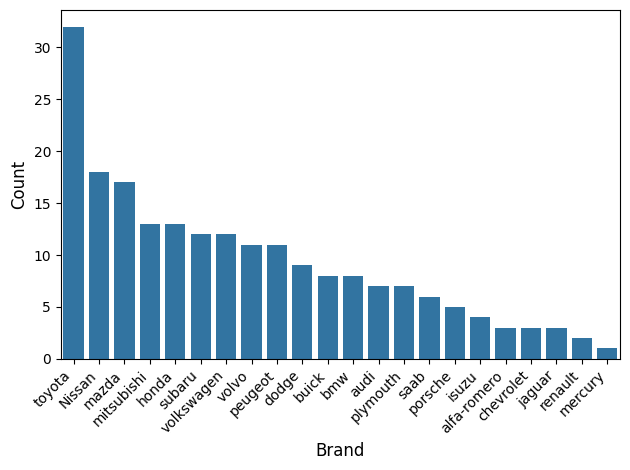

In [123]:
car_brand_counts=df['Brand'].value_counts()
sns.barplot(x=car_brand_counts.index, y=car_brand_counts.values)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Brand Analysis

## Data Preparation
- Extracted brand names from the 'CarName' column
- Standardized brand names by correcting common misspellings:
  - "maxda" → "mazda"
  - "nissan" → "Nissan"
  - "porcshce" → "porsche"
  - "toyouta" → "toyota"
  - "vokswagen" and "vw" → "volkswagen"

## Brand Distribution Analysis
- The dataset contains multiple car brands
- Brand distribution shows varying representation in the dataset
- Some brands have more models than others

## Key Observations
1. **Brand Standardization**
   - Several brands had multiple spelling variations
   - Standardization ensures consistent analysis
   - Important for accurate brand-based insights

2. **Dataset Composition**
   - Multiple brands represented
   - Uneven distribution of models across brands
   - Some brands may be over/under-represented

3. **Market Representation**
   - Mix of luxury and economy brands
   - Various market segments covered
   - Different price points represented

## Next Steps
- Analyze price distribution by brand

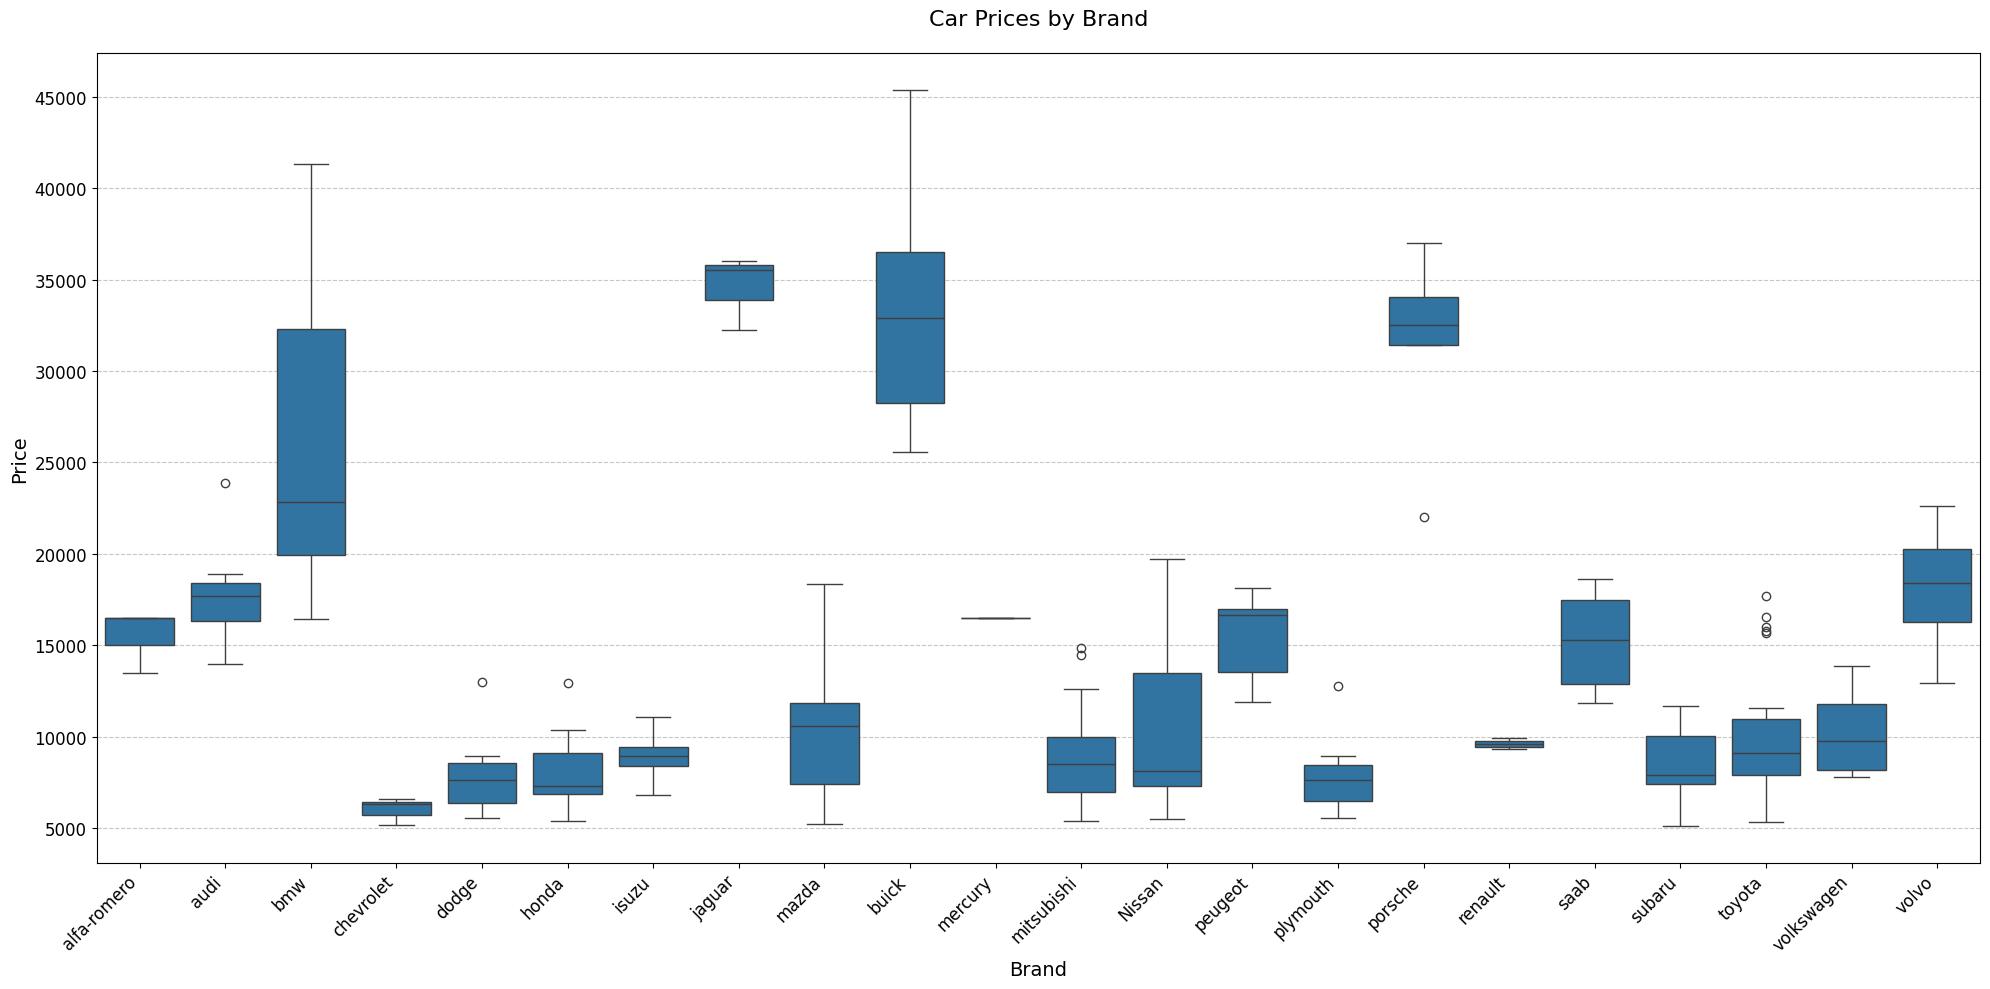

In [124]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Brand', y='price')
plt.title('Car Prices by Brand', fontsize=16, pad=20)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Price Analysis by Brand

## Key Findings from Box Plot Analysis

### 1. Luxury Brands
- **Porsche** shows the highest median price
- **Jaguar** and **BMW** also shows premium pricing

### 2. Mid-Range Brands
- **Toyota**, **Honda**, and **Nissan** show moderate price ranges
- **Volkswagen** displays a wide price distribution
### 3. Economy Brands
- **Mazda** and **Mitsubishi** show lower median prices
- **Dodge** and **Chevrolet** show competitive pricing

### 4. Price Distribution Patterns
- Most brands show some degree of price variability
- Outliers present in several brands indicate:
  - Special edition models
  - High-end variants
  - Unique features or specifications

## Implications
- Brand is a significant factor in car pricing
- Clear price seperation exists between luxury and economy brands
- Some brands show more price consistency than others
- Market positioning varies significantly across brands

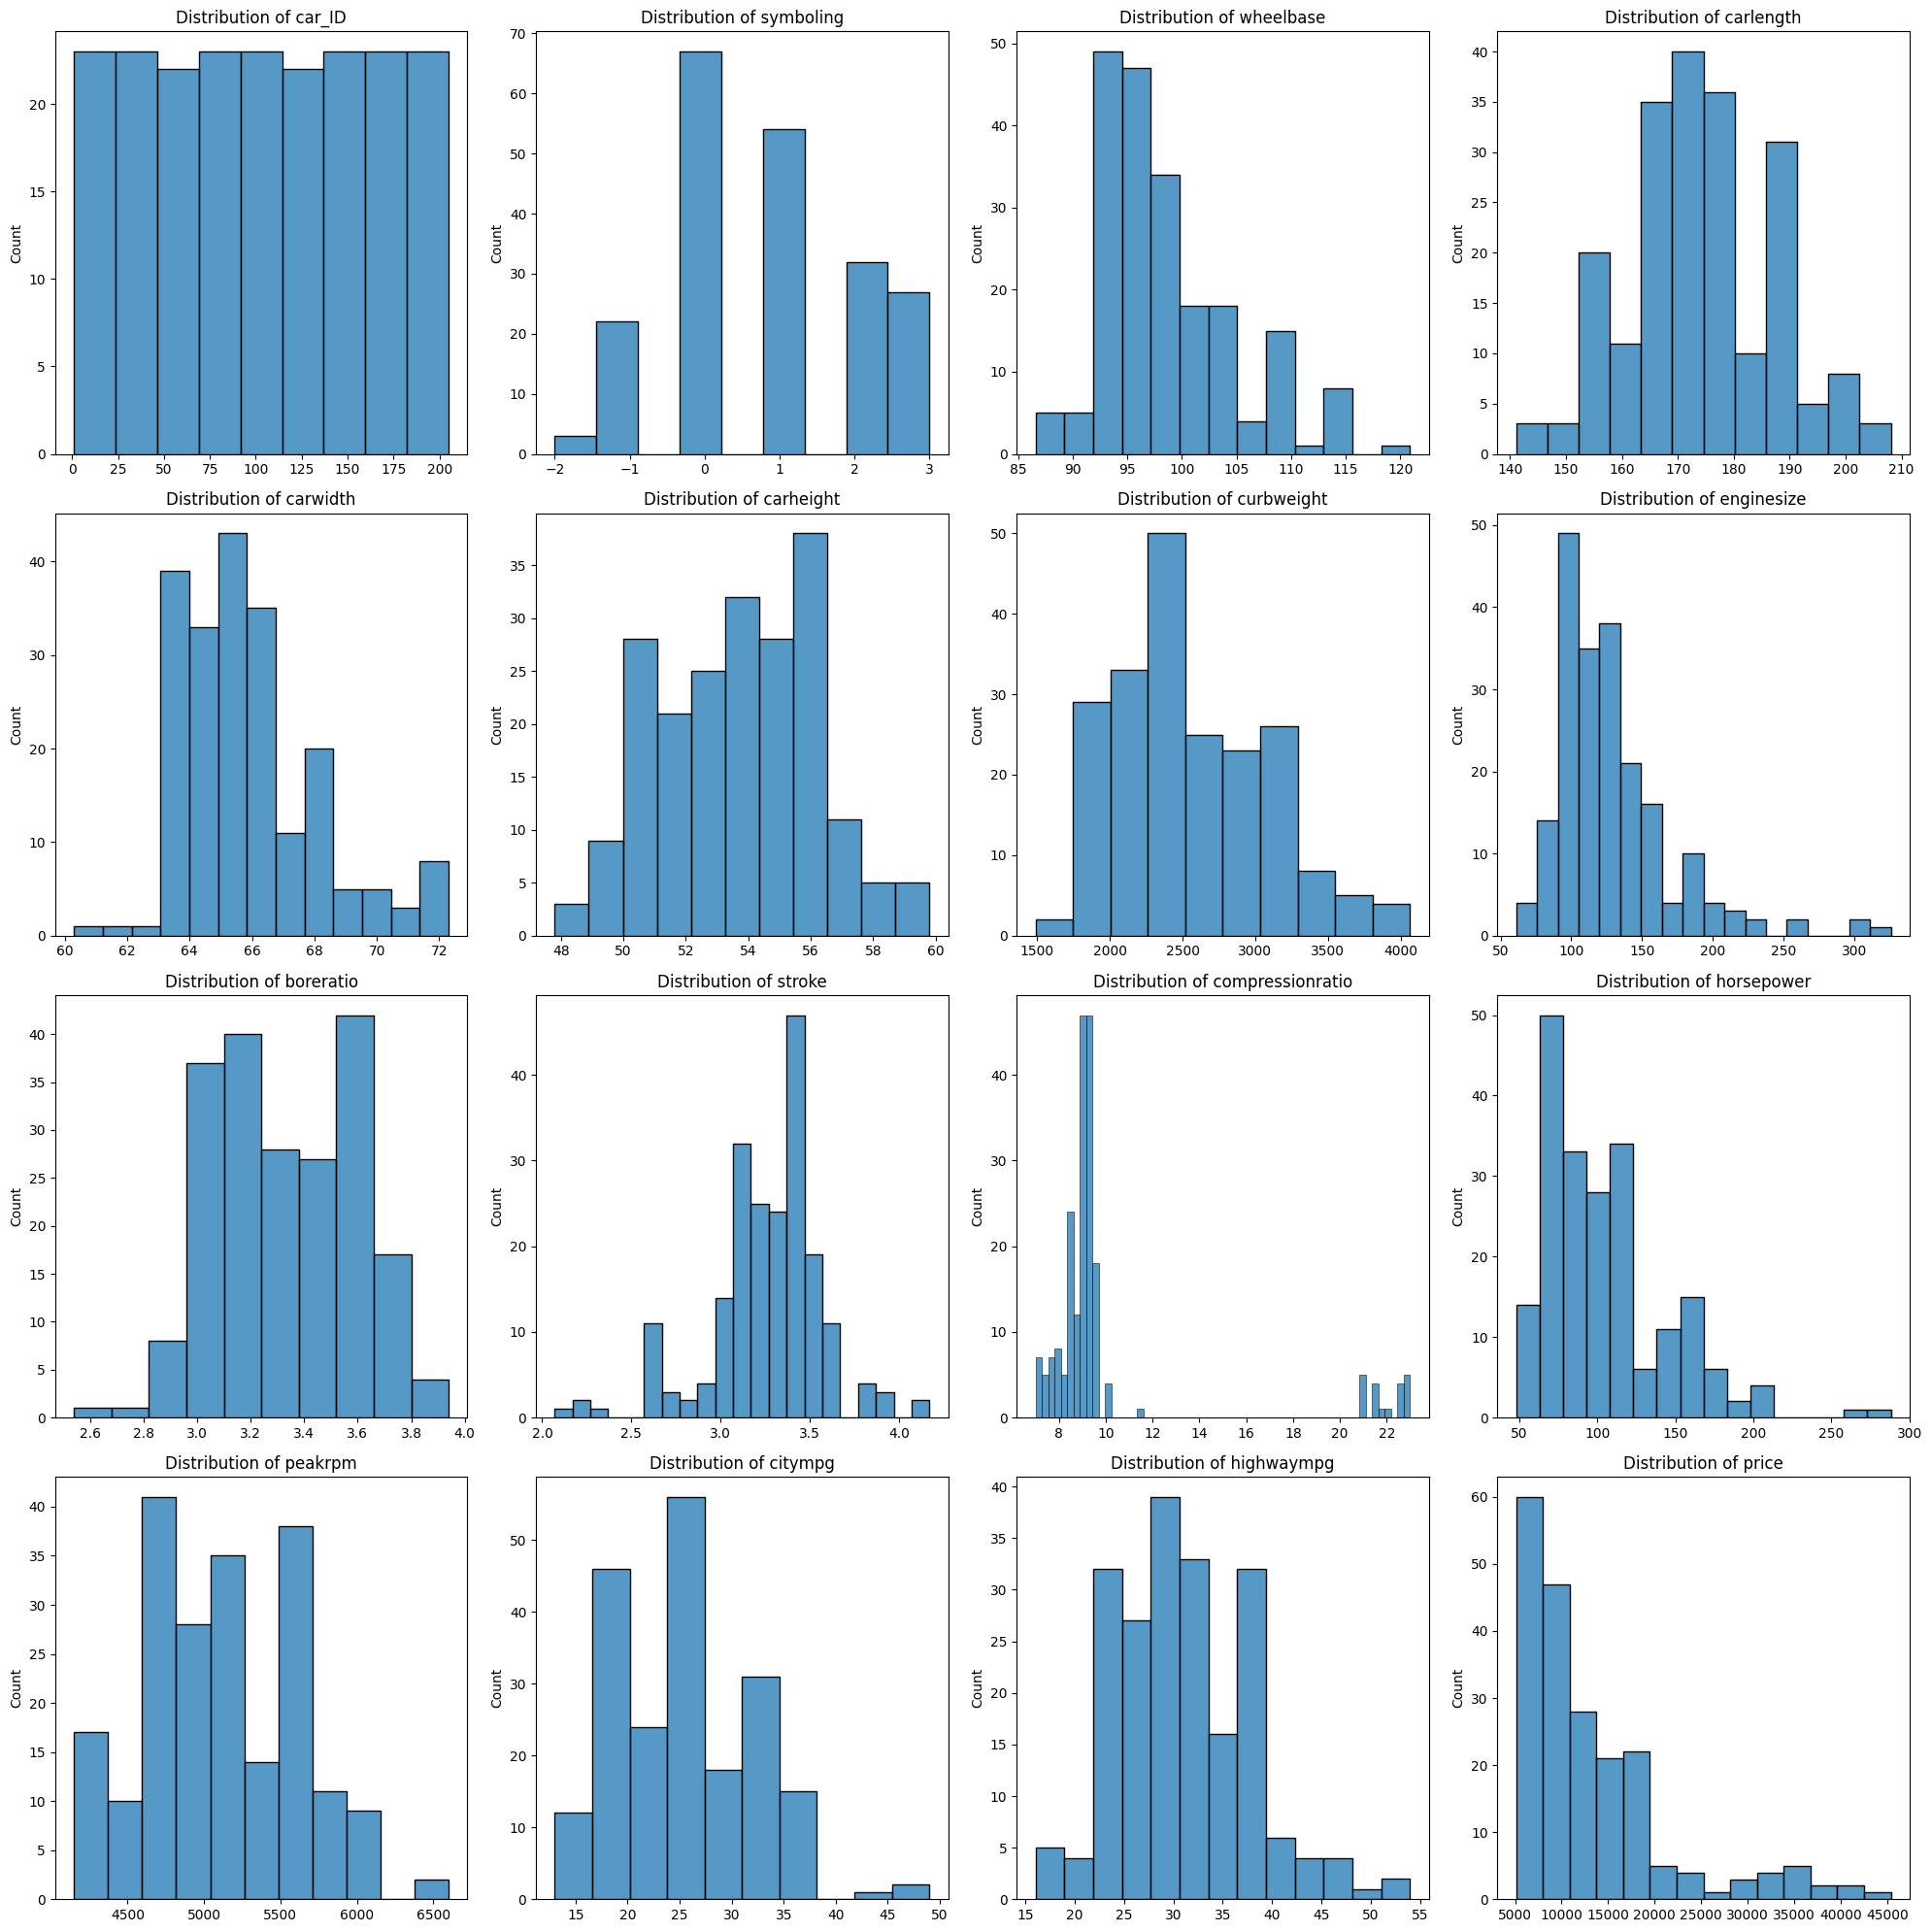

In [125]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}', fontsize=12)
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Count')

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

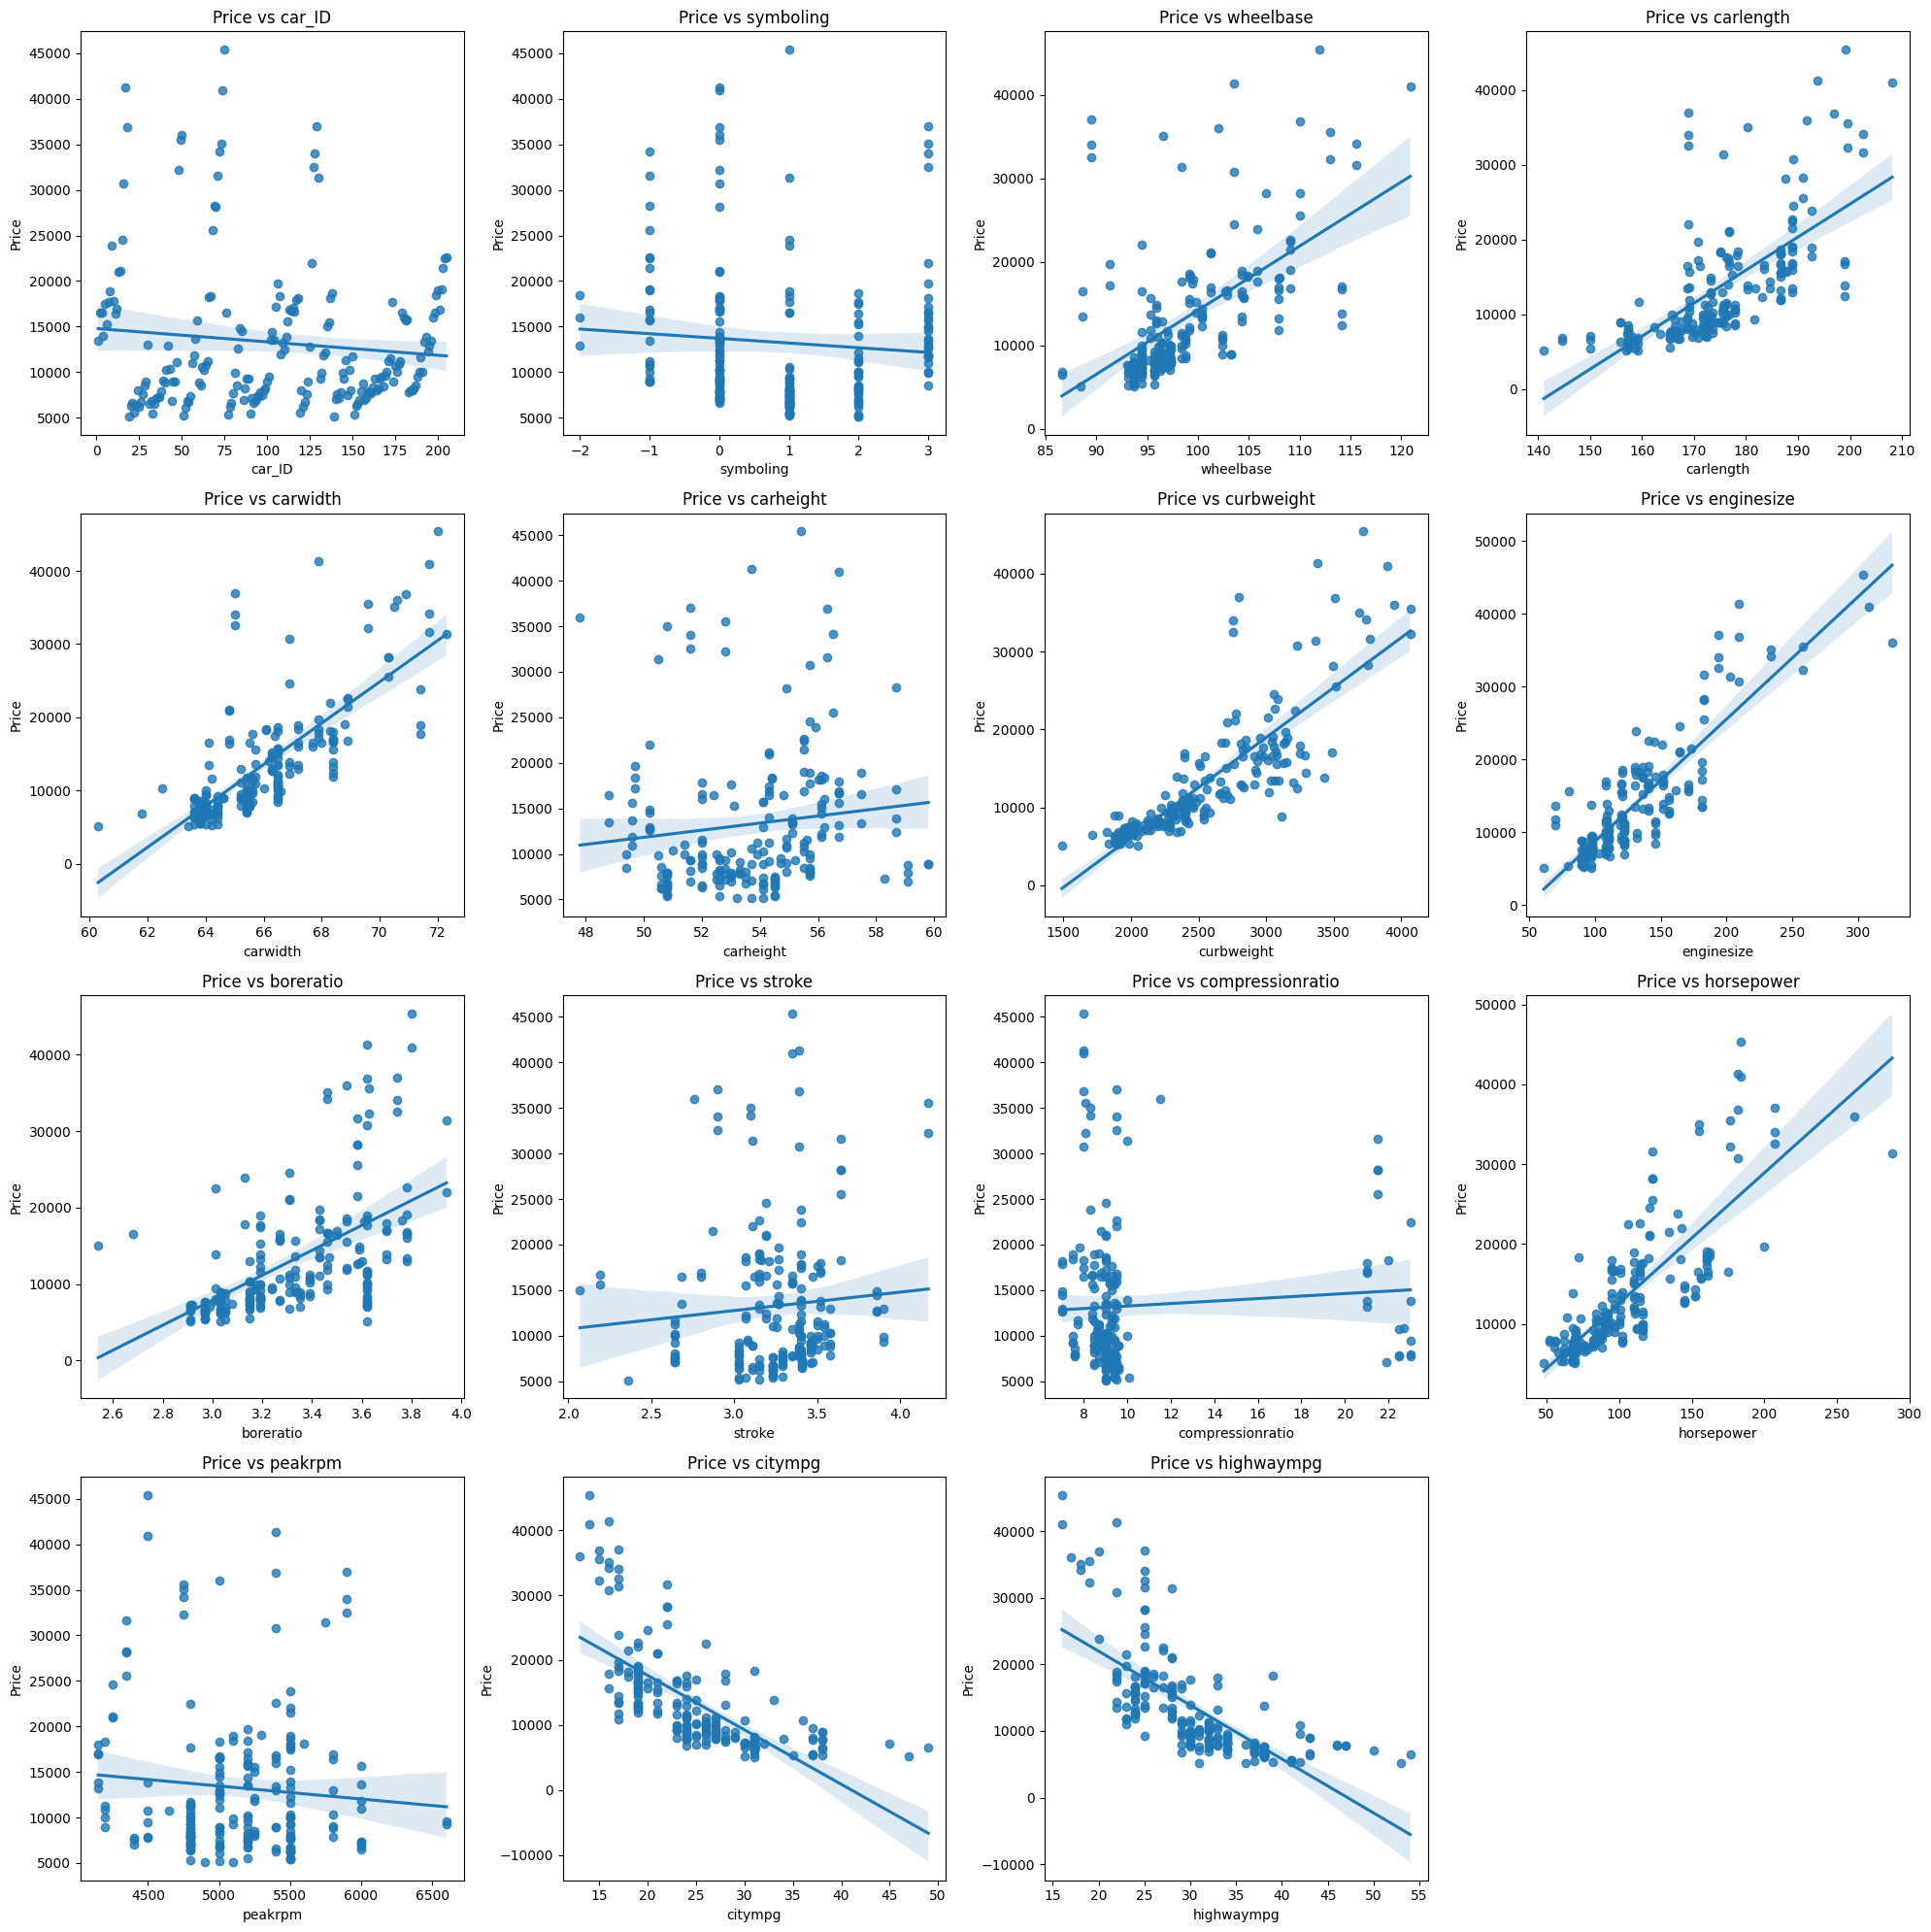

In [126]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[numerical_cols != 'price']  # Remove price from the columns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.regplot(data=df, x=col, y='price', ax=axes[idx])
        axes[idx].set_title(f'Price vs {col}', fontsize=12)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Price')

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Price Correlation Analysis

## Strong Positive Correlations with Price

### Physical Dimensions
- **Car Width**: Wider cars show higher prices
- **Car Length**: Longer vehicles command premium prices
- **Wheelbase**: Longer wheelbase correlates with higher prices

### Performance Metrics
- **Engine Size**: Larger engines show strong positive correlation with price
- **Horsepower**: Higher horsepower significantly impacts price
- **Curb Weight**: Heavier vehicles generally cost more

## Negative Correlations with Price

### Fuel Efficiency Metrics
- **Highway MPG**: Higher highway fuel efficiency correlates with lower prices
- **City MPG**: Higher city fuel efficiency correlates with lower prices

## Key Implications
1. **Size and Performance Impact**
   - Physical size and performance are key price determinants
   - Larger, more powerful vehicles command premium pricing
   - These features collectively indicate a vehicle's market positioning

2. **Fuel Efficiency Trade-off**
   - More fuel-efficient vehicles tend to be less expensive
   - Premium vehicles often sacrifice fuel efficiency for performance
   - Economy cars prioritize fuel efficiency as a selling point

3. **Market Segmentation**
   - Clear distinction between economy and luxury segments
   - Economy cars focus on fuel efficiency and affordability
   - Luxury vehicles emphasize size, power, and features

4. **Price Prediction Relevance**
   - These correlations suggest important features for price prediction
   - Physical dimensions and performance metrics are strong indicators
   - Fuel efficiency metrics provide inverse price signals

## Model Training and Evaluation

In this section, we will train a linear regression model to predict car prices based on the selected features. The data will be split into training and test sets, features will be scaled and encoded as needed, and model performance will be evaluated.

In [127]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['car_ID', 'CarName','Brand']

X = df.drop(columns_to_drop + ['price'], axis=1)  # Features
y = df['price']  # Target variable

# Define numerical and categorical columns
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                   'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [128]:
# Fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.8429
